In [42]:
# Restart kernel to reload updated modules
import importlib
import sys

# Clear module cache to reload helpers and other modules with new functions
modules_to_reload = ['helpers', 'data_fetcher', 'data_processor', 'analytics', 'visualizations']
for module in modules_to_reload:
    if module in sys.modules:
        del sys.modules[module]

## 1. Setup and Imports

In [43]:
# Import necessary modules
import sys # sys is needed to modify the path
import os # os is needed to get the current working directory

# If you don't know what is meant by path here, it means the list of directories Python searches for modules to import.
# We need to add the parent directory's src and utils folders to the path
# os.path.dirname gets the parent directory, since we're in the notebooks folder
parent_dir = os.path.dirname(os.getcwd())

# Add src directory to path
sys.path.append(os.path.join(parent_dir, 'src'))
sys.path.append(os.path.join(parent_dir, 'utils'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import custom modules
from data_fetcher import MLBDataFetcher #MLBDataFetcher is a class that fetches MLB data
from data_processor import MLBDataProcessor #MLBDataProcessor is a class that processes MLB data
from analytics import BattingAnalytics, PitchingAnalytics, TeamAnalytics # BattingAnalytics, PitchingAnalytics, TeamAnalytics are classes for performing analytics
from visualizations import StatsVisualizer # StatsVisualizer is a class for visualizing stats
from helpers import get_current_season, TEAM_IDS, get_team_name # get_current_season is a function that returns the current MLB season, TEAM_IDS is a dictionary of team IDs, get_team_name gets team name from ID

# Display settings
pd.set_option('display.max_columns', None) #This means to display all columns when printing a DataFrame
pd.set_option('display.width', None) #This means to not limit the width when printing a DataFrame
    
print("✓ All modules imported successfully!")

✓ All modules imported successfully!


## 2. Fetching Player Data

Let's fetch some player statistics from the MLB API.

In [44]:
# Initialize the data fetcher and processor
fetcher = MLBDataFetcher()
processor = MLBDataProcessor()

# Get current season
current_season = get_current_season()
print(f"Analyzing data for the {current_season} season")

Analyzing data for the 2025 season


In [45]:
# Search for a player - Example: Aaron Judge
player_name = "Gunnar Henderson"
players = fetcher.search_players(player_name)

if players:
    player = players[0]
    player_id = player['id']
    print(f"Found: {player['fullName']} (ID: {player_id})")
    print(f"Position: {player.get('primaryPosition', {}).get('name', 'N/A')}")
    # Get team name from team ID if available
    team_id = player.get('currentTeam', {}).get('id')
    team_name = get_team_name(team_id) if team_id else 'N/A'
    print(f"Team: {team_name}")
else:
    print(f"Player '{player_name}' not found")
    player_id = None

Found: Gunnar Henderson (ID: 683002)
Position: Shortstop
Team: Orioles


In [46]:
# Fetch player statistics (if player was found)
if player_id:
    player_stats = fetcher.get_player_stats(player_id, current_season, stat_group="hitting")
    print(f"\nSuccessfully fetched statistics for {player_stats.get('fullName', 'Unknown')}")


Successfully fetched statistics for Gunnar Henderson


## 3. Processing Statistics

Now let's process and structure the data.

## 2.5 Stats Leaders - Top Players by Category

Get the top 50 players for any statistical category.

In [47]:
# Get top 50 home run leaders for the current season
print("=== Top 10 Home Run Leaders ===\n")
hr_leaders = fetcher.get_stats_leaders("homeRuns", season=current_season, limit=10, stat_group="hitting")
hr_df = processor.extract_stats_leaders(hr_leaders)

if not hr_df.empty:
    print(hr_df.to_string(index=False))
else:
    print("No data available")

=== Top 10 Home Run Leaders ===

 rank      playerName  playerId                  team  teamId value
    1     Cal Raleigh    663728      Seattle Mariners     136    60
    2  Kyle Schwarber    656941 Philadelphia Phillies     143    56
    3   Shohei Ohtani    660271   Los Angeles Dodgers     119    55
    4     Aaron Judge    592450      New York Yankees     147    53
    5  Eugenio Suárez    553993      Seattle Mariners     136    49
    6 Junior Caminero    691406        Tampa Bay Rays     139    45
    7       Juan Soto    665742         New York Mets     121    43
    8     Pete Alonso    624413         New York Mets     121    38
    9        Jo Adell    666176    Los Angeles Angels     108    37
   10    Riley Greene    682985        Detroit Tigers     116    36
   10      Nick Kurtz    701762             Athletics     133    36
   10     Taylor Ward    621493    Los Angeles Angels     108    36


In [48]:
# Get top ERA leaders (pitchers)
print("\n=== Top 10 ERA Leaders (Pitchers) ===\n")
era_leaders = fetcher.get_stats_leaders("era", season=current_season, limit=10, stat_group="pitching")
era_df = processor.extract_stats_leaders(era_leaders)

if not era_df.empty:
    print(era_df.to_string(index=False))
else:
    print("No data available")


=== Top 10 ERA Leaders (Pitchers) ===

 rank         playerName  playerId                  team  teamId value
    1        Paul Skenes    694973    Pittsburgh Pirates     134  1.97
    2       Tarik Skubal    669373        Detroit Tigers     116  2.21
    3       Hunter Brown    686613        Houston Astros     117  2.43
    4 Yoshinobu Yamamoto    808967   Los Angeles Dodgers     119  2.49
    5 Cristopher Sánchez    650911 Philadelphia Phillies     143  2.50
    6    Garrett Crochet    676979        Boston Red Sox     111  2.59
    7     Freddy Peralta    642547     Milwaukee Brewers     158  2.70
    8          Max Fried    608331      New York Yankees     147  2.86
    9      Andrew Abbott    671096       Cincinnati Reds     113  2.87
   10       Nick Pivetta    601713      San Diego Padres     135  2.87


In [49]:
# Get top stolen base leaders
print("\n=== Top 10 Stolen Base Leaders ===\n")
sb_leaders = fetcher.get_stats_leaders("stolenBases", season=current_season, limit=10, stat_group="hitting")
sb_df = processor.extract_stats_leaders(sb_leaders)

if not sb_df.empty:
    print(sb_df.to_string(index=False))
else:
    print("No data available")

# Other available stats you can try:
# Hitting: 'avg', 'obp', 'slg', 'ops', 'rbi', 'runs', 'hits', 'doubles', 'triples'
# Pitching: 'wins', 'strikeouts', 'saves', 'whip', 'inningsPitched'


=== Top 10 Stolen Base Leaders ===

 rank          playerName  playerId                  team  teamId value
    1      José Caballero    676609      New York Yankees     147    49
    2        José Ramírez    608070   Cleveland Guardians     114    44
    2    Chandler Simpson    802415        Tampa Bay Rays     139    44
    4          Oneil Cruz    665833    Pittsburgh Pirates     134    38
    4           Juan Soto    665742         New York Mets     121    38
    4      Bobby Witt Jr.    677951    Kansas City Royals     118    38
    7     Elly De La Cruz    682829       Cincinnati Reds     113    37
    8         Trea Turner    607208 Philadelphia Phillies     143    36
    9 Pete Crow-Armstrong    691718          Chicago Cubs     112    35
   10     Victor Scott II    687363   St. Louis Cardinals     138    34


In [50]:
# Initialize the data processor
processor = MLBDataProcessor()

# Extract batting statistics
if player_id and player_stats:
    batting_df = processor.extract_batting_stats(player_stats)
    
    if not batting_df.empty:
        # Convert to numeric
        batting_df = processor.convert_numeric_columns(batting_df, exclude_cols=['season'])
        
        print("\nBatting Statistics:")
        print(batting_df.to_string(index=False))
    else:
        print("No batting statistics available")


Batting Statistics:
season  gamesPlayed  atBats  runs  hits  doubles  triples  homeRuns  rbi  stolenBases  caughtStealing  walks  strikeouts   avg   obp   slg   ops
  2022           34     116    12    30        7        1         4   18            1               1     16          34 0.259 0.348 0.440 0.788
  2023          150     560   100   143       29        9        28   82           10               3     56         159 0.255 0.325 0.489 0.814
  2024          159     630   118   177       31        7        37   92           21               4     78         159 0.281 0.364 0.529 0.893
  2025          154     577    85   158       34        5        17   68           30               5     62         137 0.274 0.349 0.438 0.787


c:\VibeCoding_BaseballAnalysis\src\data_processor.py:123: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_copy[col] = pd.to_numeric(df_copy[col], errors='ignore')


## 4. Advanced Analytics

Calculate advanced baseball metrics.

In [7]:
# Initialize analytics modules
batting_analytics = BattingAnalytics()
pitching_analytics = PitchingAnalytics()

# Example: Calculate advanced metrics from custom data
print("\n=== Advanced Batting Metrics Example ===")

# Sample statistics
hits = 180
doubles = 35
triples = 3
home_runs = 45
walks = 75
at_bats = 550
strikeouts = 150
hbp = 5

# Calculate metrics
avg = batting_analytics.calculate_batting_average(hits, at_bats)
singles = hits - doubles - triples - home_runs
obp = batting_analytics.calculate_on_base_percentage(hits, walks, hbp, at_bats)
slg = batting_analytics.calculate_slugging_percentage(singles, doubles, triples, home_runs, at_bats)
ops = batting_analytics.calculate_ops(obp, slg)
iso = batting_analytics.calculate_iso(slg, avg)
babip = batting_analytics.calculate_babip(hits, home_runs, at_bats, strikeouts)

print(f"Batting Average (AVG): {avg:.3f}")
print(f"On-Base Percentage (OBP): {obp:.3f}")
print(f"Slugging Percentage (SLG): {slg:.3f}")
print(f"OPS: {ops:.3f}")
print(f"Isolated Power (ISO): {iso:.3f}")
print(f"BABIP: {babip:.3f}")


=== Advanced Batting Metrics Example ===
Batting Average (AVG): 0.327
On-Base Percentage (OBP): 0.413
Slugging Percentage (SLG): 0.647
OPS: 1.060
Isolated Power (ISO): 0.320
BABIP: 0.380


In [9]:
# Example: Pitching analytics
print("\n=== Pitching Analytics Example ===")

# Sample pitching statistics
earned_runs = 65
innings_pitched = 200.0
hits_allowed = 175
walks_allowed = 45
strikeouts_pitched = 245
home_runs_allowed = 22

# Calculate pitching metrics
era = pitching_analytics.calculate_era(earned_runs, innings_pitched)
whip = pitching_analytics.calculate_whip(walks_allowed, hits_allowed, innings_pitched)
k9 = pitching_analytics.calculate_k_per_9(strikeouts_pitched, innings_pitched)
bb9 = pitching_analytics.calculate_bb_per_9(walks_allowed, innings_pitched)
k_bb = pitching_analytics.calculate_k_bb_ratio(strikeouts_pitched, walks_allowed)
fip = pitching_analytics.calculate_fip(home_runs_allowed, walks_allowed, 8, strikeouts_pitched, innings_pitched)

print(f"ERA: {era:.2f}")
print(f"WHIP: {whip:.2f}")
print(f"K/9: {k9:.2f}")
print(f"BB/9: {bb9:.2f}")
print(f"K/BB Ratio: {k_bb:.2f}")
print(f"FIP: {fip:.2f}")


=== Pitching Analytics Example ===
ERA: 2.92
WHIP: 1.10
K/9: 11.03
BB/9: 2.02
K/BB Ratio: 5.44
FIP: 2.88


## 5. Visualizations

Create visualizations to analyze the data.

In [10]:
# Initialize visualizer
viz = StatsVisualizer()

# Create sample comparison data
comparison_data = pd.DataFrame({
    'playerName': ['Judge', 'Trout', 'Ohtani', 'Betts'],
    'homeRuns': [45, 38, 44, 35],
    'rbi': [115, 95, 105, 98],
    'avg': [.285, .295, .275, .310],
    'ops': [.950, .920, .940, .900],
    'stolenBases': [8, 12, 15, 22]
})

print("Player Comparison Data:")
print(comparison_data)

Player Comparison Data:
  playerName  homeRuns  rbi    avg   ops  stolenBases
0      Judge        45  115  0.285  0.95            8
1      Trout        38   95  0.295  0.92           12
2     Ohtani        44  105  0.275  0.94           15
3      Betts        35   98  0.310  0.90           22


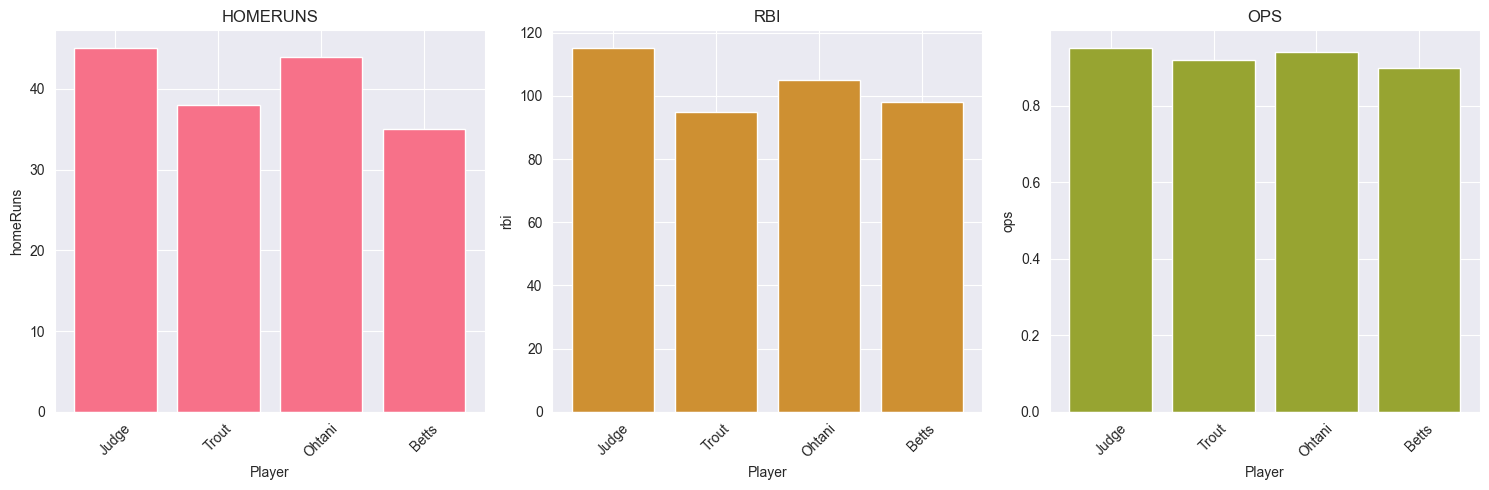

In [11]:
# Create batting comparison chart
fig = viz.plot_batting_comparison(
    comparison_data,
    metrics=['homeRuns', 'rbi', 'ops'],
    figsize=(15, 5)
)
plt.show()

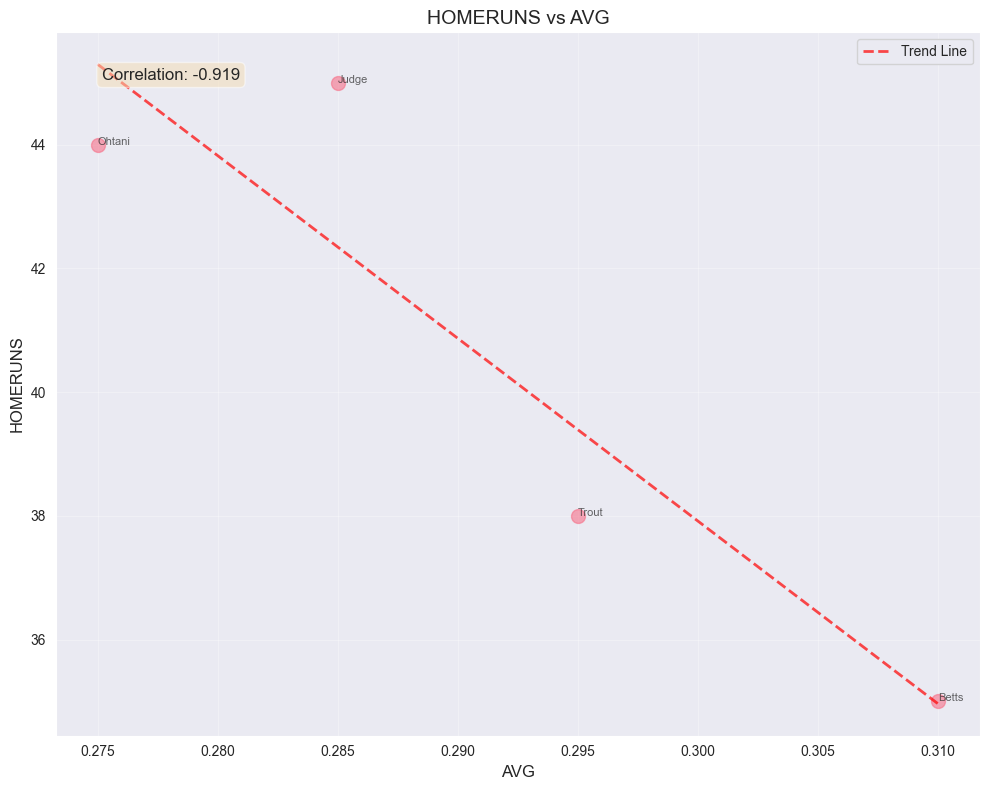

In [12]:
# Create scatter plot comparison
fig = viz.plot_scatter_comparison(
    comparison_data,
    x_metric='avg',
    y_metric='homeRuns',
    label_col='playerName',
    show_correlation=True
)
plt.show()

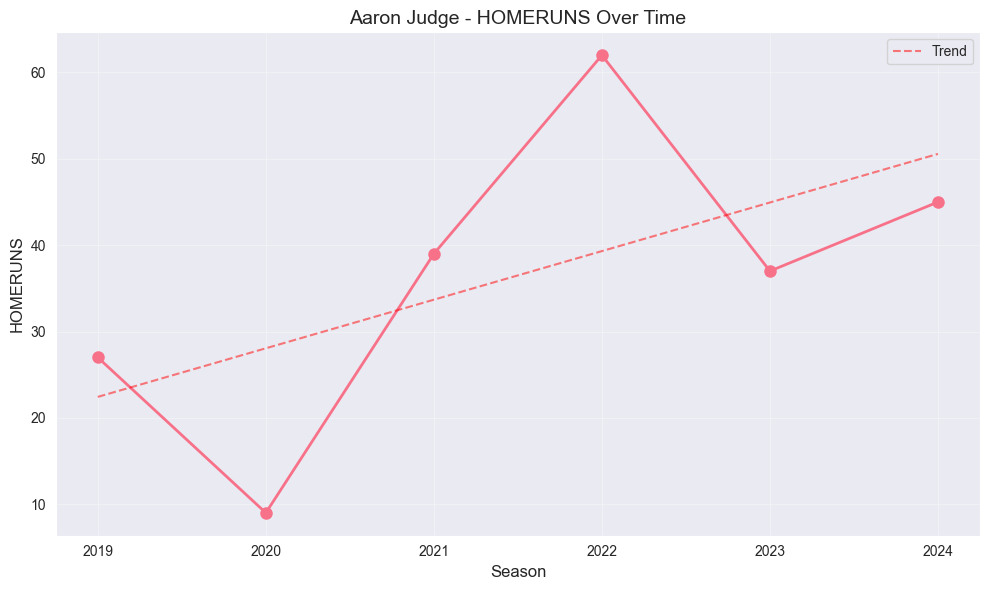

In [13]:
# Create career trajectory (sample data)
career_data = pd.DataFrame({
    'season': [2019, 2020, 2021, 2022, 2023, 2024],
    'homeRuns': [27, 9, 39, 62, 37, 45],
    'avg': [.272, .257, .287, .311, .267, .285],
    'ops': [.921, .756, .916, 1.111, .882, .950]
})

fig = viz.plot_career_trajectory(
    career_data,
    metric='homeRuns',
    player_name='Aaron Judge'
)
plt.show()

## 6. Player Comparisons and Rankings

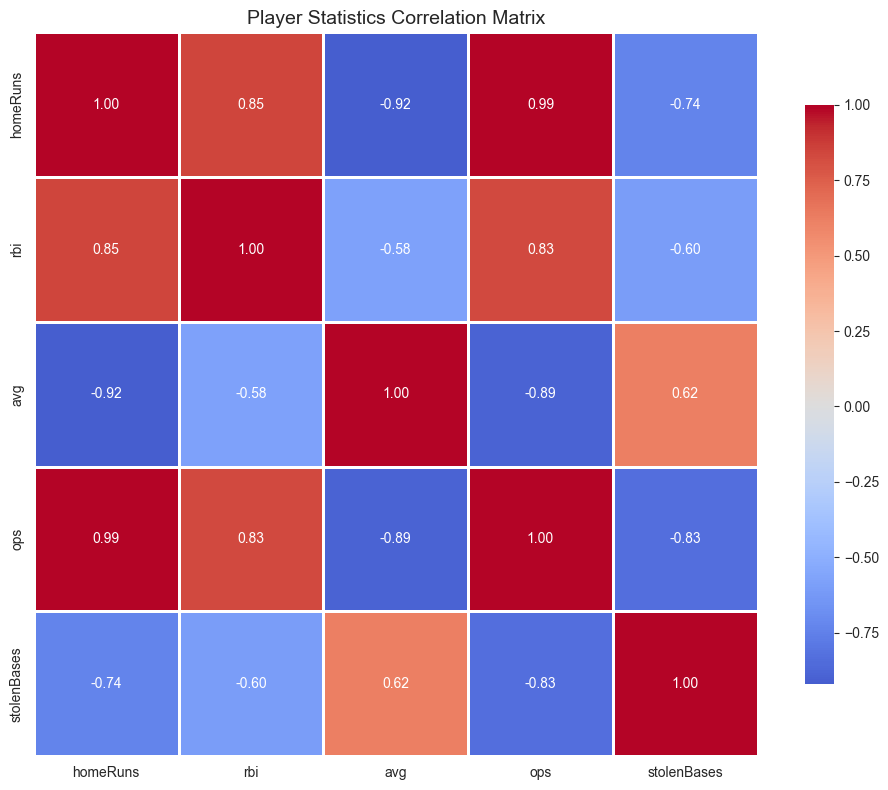

In [14]:
# Create correlation heatmap
fig = viz.plot_heatmap(
    comparison_data,
    metrics=['homeRuns', 'rbi', 'avg', 'ops', 'stolenBases'],
    title='Player Statistics Correlation Matrix'
)
plt.show()

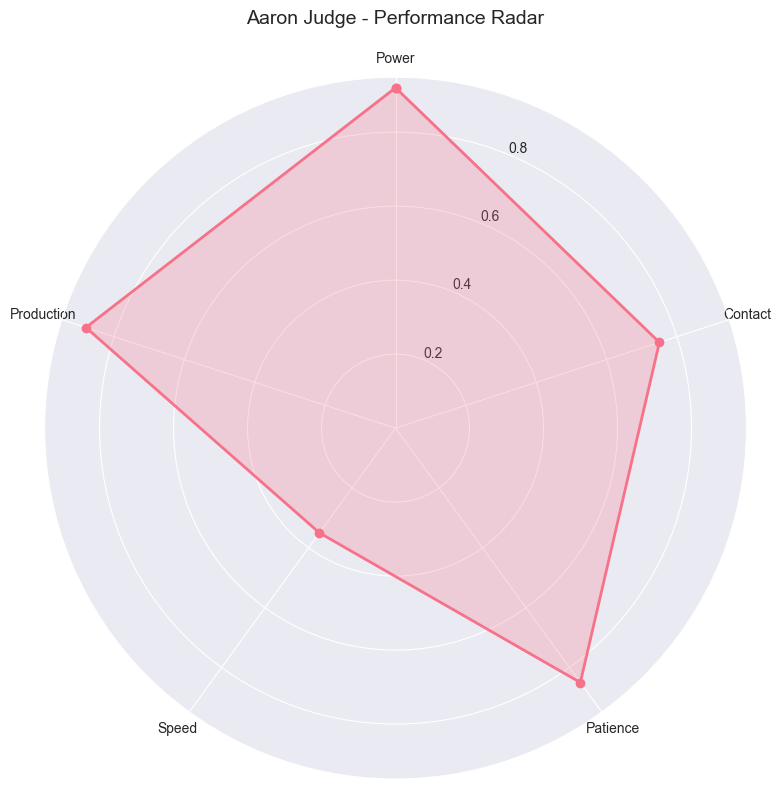

In [15]:
# Create radar chart for individual player
player_metrics = {
    'Power': 0.92,      # Normalized home run rate
    'Contact': 0.75,    # Normalized batting average
    'Patience': 0.85,   # Normalized walk rate
    'Speed': 0.35,      # Normalized stolen bases
    'Production': 0.88  # Normalized RBI
}

fig = viz.plot_radar_chart(
    player_metrics,
    metrics=['Power', 'Contact', 'Patience', 'Speed', 'Production'],
    player_name='Aaron Judge'
)
plt.show()

## Summary

This notebook demonstrated:
- Fetching player data from the MLB Stats API
- Processing and structuring baseball statistics
- Calculating advanced metrics (OPS, FIP, wOBA, etc.)
- Creating various visualizations for analysis
- Comparing players across multiple dimensions

### Next Steps
- Fetch team-level statistics
- Analyze historical trends
- Build predictive models
- Export analysis reports

In [16]:
print("\n" + "="*50)
print("Analysis Complete!")
print("="*50)


Analysis Complete!
